In [1]:
"""
https://www.tensorflow.org/tutorials/quickstart/beginner
"""
import tensorflow as tf
import datetime

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.11.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [4]:
predictions = model(x_train[:1]).numpy()


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

log_dir = "../logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0228 - accuracy: 0.9922 - val_loss: 0.0853 - val_accuracy: 0.9790
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0234 - accuracy: 0.9923 - val_loss: 0.0821 - val_accuracy: 0.9802
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0237 - accuracy: 0.9918 - val_loss: 0.0810 - val_accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0238 - accuracy: 0.9920 - val_loss: 0.0821 - val_accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0209 - accuracy: 0.9926 - val_loss: 0.0891 - val_accuracy: 0.9788
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0230 - accuracy: 0.9921 - val_loss: 0.0898 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0197 - accuracy: 0.9927 - val_loss: 0.0910 - val_accuracy:

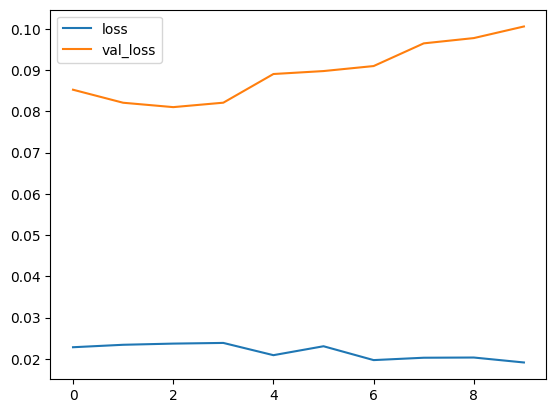

In [10]:
history = model.fit(x_train, y_train, epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard_callback])

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()


In [11]:
model.evaluate(x_test, y_test, verbose=2)


313/313 - 0s - loss: 0.1006 - accuracy: 0.9796 - 327ms/epoch - 1ms/step


[0.10061038285493851, 0.9796000123023987]

In [8]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
probability_model(x_test[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[3.5866740e-11, 5.4674393e-11, 3.8625636e-08, 1.6827231e-05,
        1.0217267e-14, 1.3105309e-09, 1.3033426e-15, 9.9998248e-01,
        9.4896213e-10, 7.5877631e-07],
       [1.3822192e-10, 6.5114600e-06, 9.9999344e-01, 6.8029955e-08,
        7.9497504e-22, 5.5860794e-10, 4.5742306e-11, 2.0087693e-15,
        5.2620586e-10, 2.6341279e-16],
       [1.7346476e-07, 9.9993110e-01, 1.0176045e-05, 8.9058808e-08,
        8.8179704e-06, 1.2055167e-06, 3.1682271e-06, 1.2638666e-05,
        3.2623429e-05, 4.8988113e-08],
       [9.9996364e-01, 3.9765610e-10, 6.0654264e-07, 3.6497396e-09,
        1.1606954e-07, 3.9534957e-06, 2.0831740e-05, 6.9398980e-06,
        3.5030567e-10, 3.8745588e-06],
       [3.8819121e-09, 1.6439071e-11, 2.1902622e-07, 1.9213120e-09,
        9.9994433e-01, 2.9538225e-09, 2.4662023e-07, 2.2855761e-07,
        6.2900352e-10, 5.4979391e-05]], dtype=float32)>